# Exploratory Data Analysis

## Import Libraries

In [1]:
import sys

import sqlite3

import pandas as pd
import re
# import matplotlib.pyplot as plt
import math
import seaborn as sb

import datetime as dt
from datetime import date

from scipy.stats import spearmanr

from tqdm import tqdm
tqdm.pandas()

sys.version

'3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]'

## Extracting data from db file and converting to pandas dataframe

In [2]:
'''
Defining SQL connection details
'''

sqliteConnection = sqlite3.connect('data/news_popularity.db')

In [3]:
'''
Extracting data from articles table for review
'''

df_articles = pd.read_sql("""SELECT * from articles""", con=sqliteConnection)

df_articles

,ID,url,timedelta,weekday,shares
0,0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,monday,593
1,1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,monday,711
2,2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,monday,1500
3,3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,monday,1200
4,4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,monday,505
...,...,...,...,...,...
39639,39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,wednesday,1800
39640,39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,wednesday,1900
39641,39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,wednesday,1900
39642,39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,wednesday,1100


In [4]:
df_articles.describe()

,ID,timedelta,shares
count,39644.000000,39644.000000,39644.000000
mean,19821.500000,354.530471,3395.380184
std,11444.381373,214.163767,11626.950749
min,0.000000,8.000000,1.000000
25%,9910.750000,164.000000,946.000000
50%,19821.500000,339.000000,1400.000000
75%,29732.250000,542.000000,2800.000000
max,39643.000000,731.000000,843300.000000


In [5]:
'''
Extracting data from description table for review
'''

df_description = pd.read_sql("""SELECT * from description""", con=sqliteConnection)

df_description

,ID,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares
0,0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,0.0,4.680365,entertainment,496.0,496.0,496.000000
1,1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,NaN,28.0,4.913725,business,0.0,0.0,0.000000
2,2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,15.0,4.393365,business,918.0,918.0,918.000000
3,3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,72.0,4.404896,entertainment,0.0,0.0,0.000000
4,4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,NaN,20.0,4.682836,technology,545.0,16000.0,3151.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,NaN,72.0,4.523121,technology,11400.0,48000.0,37033.333333
39640,39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,76.0,4.405488,social_media,2100.0,2100.0,2100.000000
39641,39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,0.0,5.076923,None,1400.0,1400.0,1400.000000
39642,39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,0.0,4.975073,world,452.0,452.0,452.000000


In [6]:
df_description.describe()

,ID,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,38851.000000,38851.000000,38058.000000,21011.000000,39644.000000,39644.000000,38851.000000,38851.000000,38851.000000
mean,19821.500000,10.398749,546.514731,0.548216,0.996469,0.689175,10.891792,3.294458,4.538336,1.284565,94.971168,4.548239,4007.686775,10357.140660,6417.144920
std,11444.381373,2.114037,471.107508,3.520708,5.231231,3.264816,11.374574,3.864212,8.285066,4.144714,472.550267,0.844406,19876.663280,41340.581032,24390.372003
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9910.750000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,2.000000,4.478404,638.000000,1100.000000,980.000000
50%,19821.500000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,16.000000,4.664082,1200.000000,2800.000000,2200.000000
75%,29732.250000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,78.000000,4.854839,2600.000000,8000.000000,5200.000000
max,39643.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,61790.000000,8.041534,843300.000000,843300.000000,843300.000000


Based on the count value across the columns, it can be observed that some values are missing

In [7]:
'''
Extracting data from keywords table for review
'''

df_keywords = pd.read_sql("""SELECT * from keywords""", con=sqliteConnection)

df_keywords

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
0,0,5.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1,4.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,2,6.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,3,7.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,4,7.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
35675,39638,6.0,-1.0,459.0,91.000,0.0,843300.0,484083.333333,0.000000,4301.332394,2665.713159
35676,39639,8.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764
35677,39640,7.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830
35678,39642,5.0,-1.0,0.0,-1.000,0.0,843300.0,254600.000000,0.000000,3384.316871,1777.895883


In [8]:
df_keywords.describe()

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
count,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000
mean,19823.468918,7.220095,26.169703,1142.296851,310.297441,13533.498851,752318.562220,259143.787814,1115.670961,5637.977838,3130.799667
std,11452.292291,1.909604,69.705812,3844.829034,616.961660,57623.779316,214391.922961,135080.424060,1136.741358,6026.965362,1311.012948
min,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,9890.750000,6.000000,-1.000000,445.000000,141.440476,0.000000,843300.000000,172595.650000,0.000000,3559.646658,2379.762290
50%,19801.500000,7.000000,-1.000000,658.000000,235.428571,1400.000000,843300.000000,244133.333333,1020.667532,4348.584651,2867.991456
75%,29788.250000,9.000000,4.000000,1000.000000,357.000000,7800.000000,843300.000000,330980.000000,2058.093423,6015.434738,3595.530145
max,39643.000000,10.000000,377.000000,298400.000000,42827.857143,843300.000000,843300.000000,843300.000000,3610.124972,298400.000000,43567.659946


Based on the count value, there are less values here as compared to the articles and description table

In [9]:
'''
Merging the data into a compiled df based on ID and dropping empty fields
'''

df_compiled = pd.merge(df_articles, df_description, on='ID')
df_compiled = pd.merge(df_compiled,df_keywords, on='ID')

df_compiled.dropna(inplace=True)

df_compiled

,ID,url,timedelta,weekday,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,...,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
0,0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,monday,593,12.0,219.0,0.663594,1.0,0.815385,...,5.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,monday,1500,9.0,211.0,0.575130,1.0,0.663866,...,6.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,monday,1200,9.0,531.0,0.503788,1.0,0.665635,...,7.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
5,5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,monday,855,10.0,370.0,0.559889,1.0,0.698198,...,9.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
9,10,http://mashable.com/2013/01/07/cosmic-events-d...,731.0,monday,2200,9.0,1248.0,0.490050,1.0,0.731638,...,8.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35673,39636,http://mashable.com/2014/12/27/north-korea-int...,8.0,wednesday,1700,8.0,2509.0,0.348878,1.0,0.464923,...,10.0,-1.0,646.0,152.3,31000.0,843300.0,275140.000000,2990.744681,6880.687034,4349.053221
35674,39637,http://mashable.com/2014/12/27/nypd-rafael-ram...,8.0,wednesday,1400,13.0,1629.0,0.425711,1.0,0.606092,...,8.0,-1.0,1100.0,354.0,1500.0,843300.0,200800.000000,1300.000000,4288.893701,2746.804338
35675,39638,http://mashable.com/2014/12/27/protests-contin...,8.0,wednesday,1200,11.0,223.0,0.653153,1.0,0.825758,...,6.0,-1.0,459.0,91.0,0.0,843300.0,484083.333333,0.000000,4301.332394,2665.713159
35677,39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,wednesday,1900,12.0,328.0,0.696296,1.0,0.885057,...,7.0,-1.0,616.0,184.0,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830


In [10]:
df_compiled.describe()

,ID,timedelta,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
count,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,...,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000
mean,19922.121843,352.581372,2913.728406,10.427047,587.393238,0.528525,0.983958,0.679576,10.424130,3.339277,...,7.154790,25.918860,1093.352030,305.896433,11916.181372,752748.418959,243077.363721,1033.435461,5161.740312,2896.436047
std,11443.560845,214.127297,8958.057782,2.138548,486.569845,0.118744,0.125643,0.129813,10.842605,3.778047,...,1.948106,69.447567,3810.508764,676.562797,53053.919773,214232.852719,123594.944827,1071.413935,5798.079446,1148.759414
min,0.000000,8.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,9971.000000,163.000000,931.000000,9.000000,273.000000,0.467066,1.000000,0.628770,4.000000,1.000000,...,6.000000,-1.000000,442.000000,141.400000,0.000000,843300.000000,166480.000000,0.000000,3506.368166,2319.708367
50%,20009.000000,336.000000,1400.000000,10.000000,449.000000,0.532258,1.000000,0.689944,7.000000,3.000000,...,7.000000,-1.000000,656.000000,236.400000,1200.000000,843300.000000,229162.500000,952.000000,4047.970588,2741.867598
75%,29835.000000,541.000000,2600.000000,12.000000,765.000000,0.600000,1.000000,0.752351,13.000000,4.000000,...,9.000000,4.000000,1000.000000,361.142857,6800.000000,843300.000000,312130.000000,1942.750000,5345.321429,3288.173424
max,39642.000000,731.000000,663600.000000,19.000000,7764.000000,0.976190,1.000000,1.000000,304.000000,65.000000,...,10.000000,294.000000,298400.000000,42827.857143,843300.000000,843300.000000,843300.000000,3591.297528,298400.000000,43567.659946


## Preliminary data analysis

In [11]:
'''
Checking if all the urls are from mashable
'''

url_re = re.compile(r'\w*mashable\w*')

url_check = []

url_check = df_compiled['url'].progress_apply(lambda x: True if url_re.findall(x) else False)

print('All urls are from mashable: ', set(url_check))

100%|██████████| 15085/15085 [00:00<00:00, 210073.10it/s]

All urls are from mashable:  {True}


In [12]:
'''
Extracting dates of articles extracted from mashable to determine the date range when the dataset was acquired
'''

url_re = re.compile(r'(20[0-1][0-5]([-_/]?)[0-9]{2}(?:\2[0-9]{2})?)')

dates = df_compiled['url'].progress_apply(lambda x: url_re.search(x).group())

print(f"The date range of data collection is from {dates.min()} to {dates.max()}")

100%|██████████| 15085/15085 [00:00<00:00, 521862.04it/s]

The date range of data collection is from 2013/01/07 to 2014/12/27


In [13]:
'''
The maximum, minimum and average number of shares
'''

print('Average number of shares:', df_compiled['shares'].mean())
print('Maximum number of shares:', df_compiled['shares'].max())
print('Minimum number of shares:', df_compiled['shares'].min())


Average number of shares: 2913.7284057010274
Maximum number of shares: 663600
Minimum number of shares: 5


In [14]:
df_compiled.nunique()

ID                           15085
url                          15085
timedelta                      724
weekday                          7
shares                        1083
n_tokens_title                  18
n_tokens_content              1939
n_unique_tokens              12852
n_non_stop_words              1255
n_non_stop_unique_tokens     11472
num_hrefs                      111
num_self_hrefs                  47
num_imgs                        73
num_videos                      44
n_comments                     513
average_token_length         13190
data_channel                     6
self_reference_min_shares     1034
self_reference_max_shares      888
self_reference_avg_shares     4322
num_keywords                    10
kw_min_min                      19
kw_max_min                     946
kw_avg_min                    8966
kw_min_max                     740
kw_max_max                      26
kw_avg_max                   13073
kw_min_avg                    6979
kw_max_avg          

In [15]:
df_compiled.std(axis=0, skipna=True)

ID                            11443.560845
timedelta                       214.127297
shares                         8958.057782
n_tokens_title                    2.138548
n_tokens_content                486.569845
n_unique_tokens                   0.118744
n_non_stop_words                  0.125643
n_non_stop_unique_tokens          0.129813
num_hrefs                        10.842605
num_self_hrefs                    3.778047
num_imgs                          7.775986
num_videos                        3.657251
n_comments                      278.853321
average_token_length              0.647354
self_reference_min_shares     20954.054636
self_reference_max_shares     40705.956718
self_reference_avg_shares     25166.501511
num_keywords                      1.948106
kw_min_min                       69.447567
kw_max_min                     3810.508764
kw_avg_min                      676.562797
kw_min_max                    53053.919773
kw_max_max                   214232.852719
kw_avg_max 

### Observations

1. The dataset is obtained from Mashable, an American entertainment, culture, tech, science and social good digital media platform, news website and multi-platform media and entertainment company.
2. The date range of data collection is from 2013/01/07 to 2014/12/27
3. Average number of shares: 2913.7284057010274
4. Maximum number of shares: 663600
5. Minimum number of shares: 5
6. Dropping empty fields reduced the dataset from 39,644 to 15085
7. Columns such as url, weekdays, data_channel will need to undergo feature engineering (e.g. monday to 1, tuesday to 2, etc.)
8. The standard deviation for some of the values are relatively high and will need to undergo normalisation (i.e. scaling) so that the distribution do not have outrageous outliers.
9. Variables will be check for correlation with shares
10. Feature-cross can be explored

1. When was the dataset acquired?
2. What is the average, minimum and maximum number of shares?
3. Which are the most and least correlated variables?
4. Are the shares affected by time? (Optional)

## Normalisation (Scaling) before visualisation and correlation

In [16]:
'''
Identifying features that will need to undergo scaling
'''

df_compiled.std(axis=0, skipna=True)

ID                            11443.560845
timedelta                       214.127297
shares                         8958.057782
n_tokens_title                    2.138548
n_tokens_content                486.569845
n_unique_tokens                   0.118744
n_non_stop_words                  0.125643
n_non_stop_unique_tokens          0.129813
num_hrefs                        10.842605
num_self_hrefs                    3.778047
num_imgs                          7.775986
num_videos                        3.657251
n_comments                      278.853321
average_token_length              0.647354
self_reference_min_shares     20954.054636
self_reference_max_shares     40705.956718
self_reference_avg_shares     25166.501511
num_keywords                      1.948106
kw_min_min                       69.447567
kw_max_min                     3810.508764
kw_avg_min                      676.562797
kw_min_max                    53053.919773
kw_max_max                   214232.852719
kw_avg_max 

In [17]:
'''
Taking log10 of the features with std > 50 so that the outliers are not too prevalent for data exploration
StandardScaler will be used for data processing before feeding to ML model
'''

# Declare list of columns to be scaled
scale_list = ['timedelta', 'shares', 'n_tokens_content', 'n_comments', 'self_reference_min_shares', 'self_reference_max_shares', 
              'self_reference_avg_shares', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 
              'kw_min_avg', 'kw_max_avg', 'kw_avg_avg']

# Function to apply log10 to the df column
def scale_para(scale_list):
    for para in scale_list:
        df_compiled[para] = df_compiled[para].progress_apply(lambda x: math.log(x) if x>0 else 0)

# Scaling the parameters provided in the list
scale_para(scale_list)

df_compiled.describe()

100%|██████████| 15085/15085 [00:00<00:00, 796213.12it/s]


,ID,timedelta,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
count,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,...,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000
mean,19922.121843,5.573479,7.412487,10.427047,6.038905,0.528525,0.983958,0.679576,10.424130,3.339277,...,7.154790,1.036599,6.357212,5.266654,4.872363,13.369210,12.183156,4.126353,8.406670,7.907687
std,11443.560845,0.898084,0.878258,2.138548,1.045183,0.118744,0.125643,0.129813,10.842605,3.778047,...,1.948106,1.695924,1.351519,1.190864,4.487510,0.959600,0.950421,3.714626,0.566268,0.479016
min,0.000000,2.079442,1.609438,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,-2.473543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9971.000000,5.093750,6.836259,9.000000,5.609472,0.467066,1.000000,0.628770,4.000000,1.000000,...,6.000000,0.000000,6.091310,4.951593,0.000000,13.645078,12.022630,0.000000,8.162336,7.749197
50%,20009.000000,5.817111,7.244228,10.000000,6.107023,0.532258,1.000000,0.689944,7.000000,3.000000,...,7.000000,0.000000,6.486161,5.465525,7.090077,13.645078,12.342187,6.858565,8.305971,7.916395
75%,29835.000000,6.293419,7.863267,12.000000,6.639876,0.600000,1.000000,0.752351,13.000000,4.000000,...,9.000000,1.386294,6.907755,5.889274,8.824678,13.645078,12.651175,7.571860,8.583977,8.098087
max,39642.000000,6.594413,13.405435,19.000000,8.957253,0.976190,1.000000,1.000000,304.000000,65.000000,...,10.000000,5.683580,12.606190,10.664944,13.645078,13.645078,13.645078,8.186269,12.606190,10.682070


## Determining Correlation between Variables

Assumptions:
1. Share refers to the number of times the article was shared and does not include related videos.

In [18]:
'''
Function to visualise scatterplot and produce correlation results
As the objective is to predict the number of shares (popularity), the scatterplot will have shares as a constant parameter 
for comparison
'''

'''
Function for scatterplot visualisation and correlation results
'''
def scatter_cor(comp_para, df_used, hue='timedelta', corr=True):
    
#     Extracting the values of the column specified
    df_extract = df_compiled.loc[:,[comp_para, 'shares']]

    if corr==True:
    #     Pearson results
        print(f'Pearson results for {comp_para} are:')
        print('---'*10)
        print(df_extract.corr(method='pearson'))
        print('\n')

    #     Spearman results
        print(f'Spearman results for {comp_para} are: \n')
        print('---'*10)
        print(df_extract.corr(method='spearman'))
        print('\n')

    #     Kendall results
        print(f'Kendall results for {comp_para} are: \n')
        print('---'*10)
        print(df_extract.corr(method='kendall'))
        print('\n')
    else:
        pass
    
#     Plotting a scatterplot based on comparison parameter with shares
    sb.relplot(x=comp_para, y='shares', hue= hue, data= df_used)
    
# Function for reg_plot for further visualisation
def reg_plot(comp_para, df_used):
    sb.regplot(x=comp_para, y='shares', data= df_used)

# Function for lm_plot for further visualisation
def lm_plot(comp_para, df_used):
    sb.lmplot(x=comp_para, y='shares', data= df_used)

<AxesSubplot:xlabel='timedelta', ylabel='Count'>

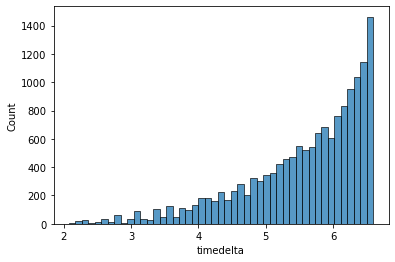

In [19]:
'''
Plotting histogram on the number of articles vs timedelta
'''

sb.histplot(df_compiled, x='timedelta')

It appears to be an exponential curve. This might imply that the dataset comprises more articles the larger the timedelta and that the number or articles per day got less as time passed. 

<AxesSubplot:xlabel='shares', ylabel='Count'>

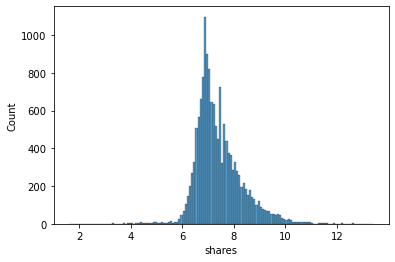

In [20]:
'''
Plotting histogram on the number of articles vs shares
'''

sb.histplot(df_compiled, x='shares')

The number of shares has a normal distribution. This implies that articles are shared to a fixed range usually where outliers will result in usually result in trending articles as observed in the long-tail to the right.

<AxesSubplot:xlabel='weekday', ylabel='Count'>

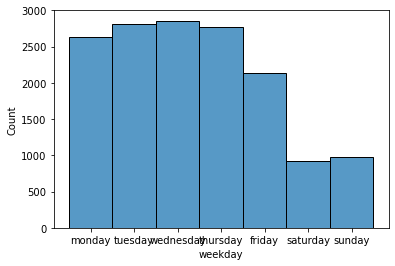

In [21]:
'''
Plotting histogram on the number of articles vs weekday
'''

sb.histplot(df_compiled, x='weekday')

There are more articles during the weekdays than weekends. The most number of articles are published on wednesdays

<AxesSubplot:xlabel='n_tokens_content', ylabel='Count'>

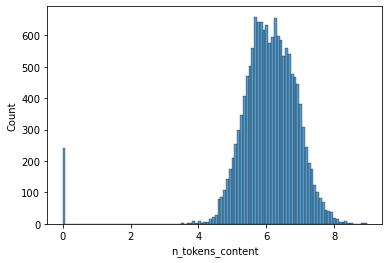

In [22]:
'''
Plotting histogram on the number of articles vs n_tokens_content
'''

sb.histplot(df_compiled, x='n_tokens_content')

There are some articles with no words in the content. This may be due to the article being only a video

<AxesSubplot:xlabel='num_keywords', ylabel='Count'>

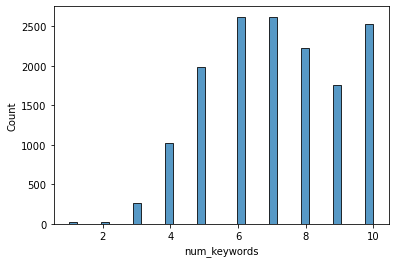

In [23]:
'''
Plotting histogram on the number of articles vs num_keywords
'''

sb.histplot(df_compiled, x='num_keywords')

Most articles have between 5 to 10 keywords.

Pearson results for timedelta are:
------------------------------
           timedelta    shares
timedelta   1.000000  0.053004
shares      0.053004  1.000000


Spearman results for timedelta are: 

------------------------------
           timedelta   shares
timedelta    1.00000  0.04979
shares       0.04979  1.00000


Kendall results for timedelta are: 

------------------------------
           timedelta    shares
timedelta   1.000000  0.033201
shares      0.033201  1.000000




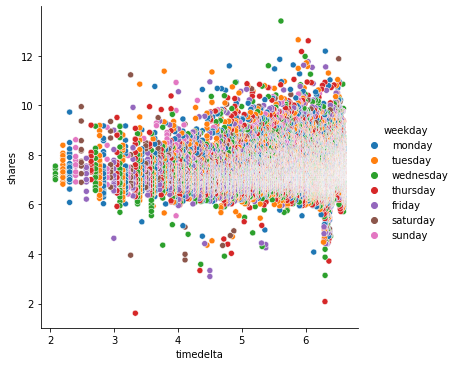

In [24]:
'''
Results of comparing timedelta with shares
'''

comp_para='timedelta'

scatter_cor(comp_para, df_compiled, 'weekday')

A logical conclusion would be that timedelta will be highly correlated to shares as news articles that have been available longer will be viewed more frequently and therefore shared more.

Although timedelta may not be highly correlated to shares in this visualisation, it may be due to the distribution of different performing news articles. Therefore, observations have to be done with other parameters/features with timedelta to observe its relationship with shares before dismissing it.

Pearson results for weekday are:
------------------------------
        shares
shares     1.0


Spearman results for weekday are: 

------------------------------
        shares
shares     1.0


Kendall results for weekday are: 

------------------------------
        shares
shares     1.0




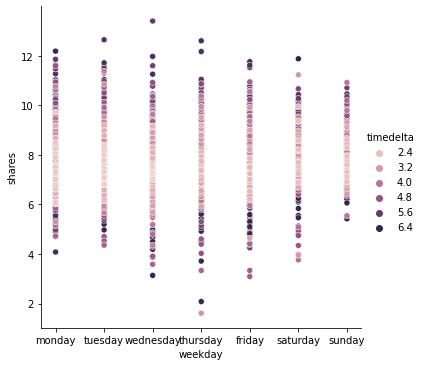

In [25]:
'''
Results of comparing weekday with shares
'''

comp_para='weekday'

scatter_cor(comp_para, df_compiled)

Although correlation may not be established due to categorical data, a relationship can be observed by the various mean shares and distribution. For example, the mean share might be lower during midweek as opposed to weekends and the beginning of the week. This may be a consequence of users having more time to browse and share articles during the weekends.

It is observed that the number of shares that are near the mean for each weekday are where the timedelta is low. This might mean that as time passes, it will likely increase over time. This can be observed by the longest timedelta at the peripheries of each respective graph. Therefore, timedelta likely have a correlation with shares and can also be observed in subsequent graphs.


In [26]:
df_test = df_compiled[['timedelta', 'shares']]

df_test

,timedelta,shares
0,6.594413,6.385194
2,6.594413,7.313220
3,6.594413,7.090077
5,6.594413,6.751101
9,6.594413,7.696213
...,...,...
35673,2.079442,7.438384
35674,2.079442,7.244228
35675,2.079442,7.090077
35677,2.079442,7.549609


Pearson results for n_tokens_title are:
------------------------------
                n_tokens_title    shares
n_tokens_title        1.000000 -0.024099
shares               -0.024099  1.000000


Spearman results for n_tokens_title are: 

------------------------------
                n_tokens_title   shares
n_tokens_title         1.00000 -0.04769
shares                -0.04769  1.00000


Kendall results for n_tokens_title are: 

------------------------------
                n_tokens_title   shares
n_tokens_title         1.00000 -0.03405
shares                -0.03405  1.00000




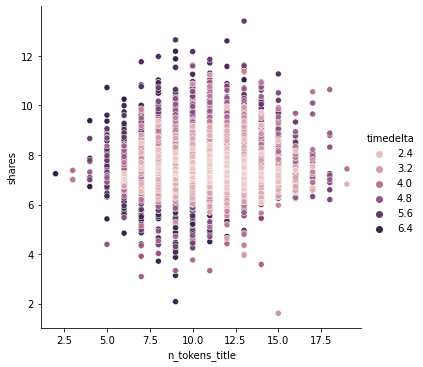

In [27]:
'''
Results of n_tokens_title with shares
'''

comp_para='n_tokens_title'

scatter_cor(comp_para, df_compiled)


The n_tokens_title is the number of unique words in the title.

Although it may not be highly correlated, a pattern can be observed where the number of shares becomes more variable the closer it gets 9 keywords. This may be the result of fewer unique words will attract a niche audience/user where shares are more definite as it fits the search criteria that the user is looking for. When there are more keywords, the number of shares may vary widely as it may not be representative of what the article is about.

It is observed that the number of shares that are near the mean for each n_tokens_title are where the timedelta is low. This might mean that as time passes, it will likely increase over time. This can be observed by the longest timedelta at the peripheries of each respective graph. Therefore, timedelta likely have a correlation with shares and can also be observed in subsequent graphs.

Therefore, it may be useful as a classification feature as opposed to a regression feature.

Pearson results for n_tokens_content are:
------------------------------
                  n_tokens_content    shares
n_tokens_content          1.000000  0.009266
shares                    0.009266  1.000000


Spearman results for n_tokens_content are: 

------------------------------
                  n_tokens_content    shares
n_tokens_content          1.000000  0.037435
shares                    0.037435  1.000000


Kendall results for n_tokens_content are: 

------------------------------
                  n_tokens_content    shares
n_tokens_content          1.000000  0.025436
shares                    0.025436  1.000000




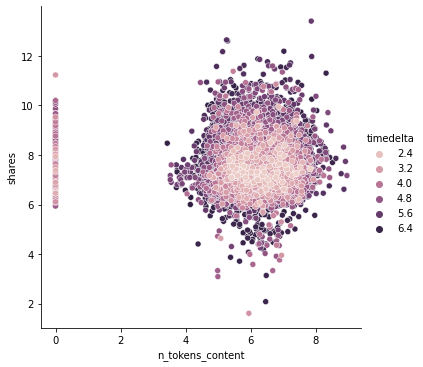

In [28]:
'''
Results of n_tokens_content with shares
'''

comp_para='n_tokens_content'

scatter_cor(comp_para, df_compiled)


The number of words in the content does not appear to be highly correlated  to the number of shares. This may be because the length of the articles are tailored to be short enough by the journalists that it does not significantly impact the user's interest in the article or to share it.

Pearson results for n_unique_tokens are:
------------------------------
                 n_unique_tokens    shares
n_unique_tokens         1.000000 -0.049745
shares                 -0.049745  1.000000


Spearman results for n_unique_tokens are: 

------------------------------
                 n_unique_tokens    shares
n_unique_tokens         1.000000 -0.059632
shares                 -0.059632  1.000000


Kendall results for n_unique_tokens are: 

------------------------------
                 n_unique_tokens    shares
n_unique_tokens         1.000000 -0.040526
shares                 -0.040526  1.000000




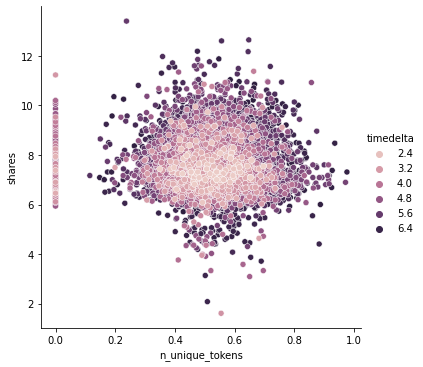

In [29]:
'''
Results of n_unique_tokens with shares
'''

comp_para='n_unique_tokens'

scatter_cor(comp_para, df_compiled)


The number of unique words in the content does not appear to be highly correlated  to the number of shares. Assuming that an article would be more interesting with an increased number of unique words, it might appear that keywords repeated may be more important than the number of unique words alone.

Pearson results for n_non_stop_words are:
------------------------------
                  n_non_stop_words    shares
n_non_stop_words          1.000000 -0.019876
shares                   -0.019876  1.000000


Spearman results for n_non_stop_words are: 

------------------------------
                  n_non_stop_words    shares
n_non_stop_words          1.000000  0.032561
shares                    0.032561  1.000000


Kendall results for n_non_stop_words are: 

------------------------------
                  n_non_stop_words    shares
n_non_stop_words          1.000000  0.022138
shares                    0.022138  1.000000




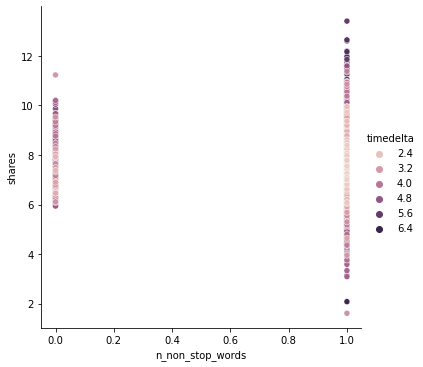

In [30]:
'''
Results of n_non_stop_words with shares
'''

comp_para='n_non_stop_words'

scatter_cor(comp_para, df_compiled)


n_non_stop_words are the rate of unique non-stop words in the content.

There does not appear to be a correlation between shares and n_non_stop_words.

Pearson results for n_non_stop_unique_tokens are:
------------------------------
                          n_non_stop_unique_tokens   shares
n_non_stop_unique_tokens                   1.00000 -0.04893
shares                                    -0.04893  1.00000


Spearman results for n_non_stop_unique_tokens are: 

------------------------------
                          n_non_stop_unique_tokens    shares
n_non_stop_unique_tokens                  1.000000 -0.058475
shares                                   -0.058475  1.000000


Kendall results for n_non_stop_unique_tokens are: 

------------------------------
                          n_non_stop_unique_tokens    shares
n_non_stop_unique_tokens                  1.000000 -0.039693
shares                                   -0.039693  1.000000




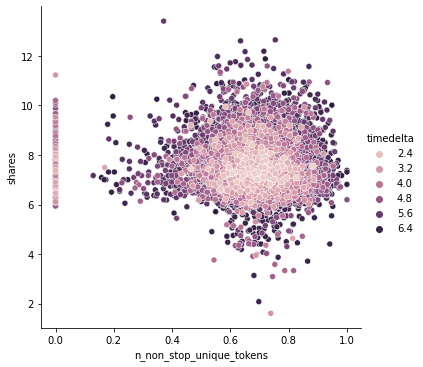

In [31]:
'''
Results of n_non_stop_unique_tokens with shares
'''

comp_para='n_non_stop_unique_tokens'

scatter_cor(comp_para, df_compiled)


n_non_stop_unique tokens is the rate of unique non-stop words in the content

The rate of unique non-stop words in the content in the content does not appear to be highly correlated  to the number of shares. This may be because the length of the articles are tailored to be short enough by the journalists that it does not significantly impact the user's interest in the article or to share it and keywords repeated may be more important than the number of unique words alone.

Pearson results for num_hrefs are:
------------------------------
           num_hrefs    shares
num_hrefs   1.000000  0.088981
shares      0.088981  1.000000


Spearman results for num_hrefs are: 

------------------------------
           num_hrefs    shares
num_hrefs   1.000000  0.071385
shares      0.071385  1.000000


Kendall results for num_hrefs are: 

------------------------------
           num_hrefs    shares
num_hrefs   1.000000  0.049471
shares      0.049471  1.000000




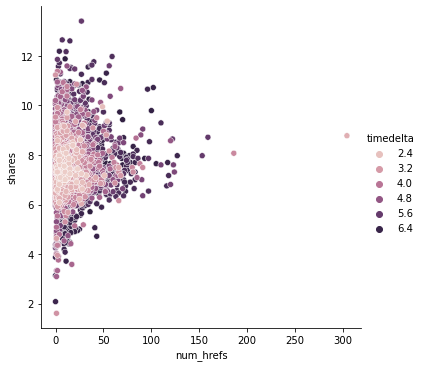

In [32]:
'''
Results of num_hrefs with shares
'''

comp_para='num_hrefs'

scatter_cor(comp_para, df_compiled)


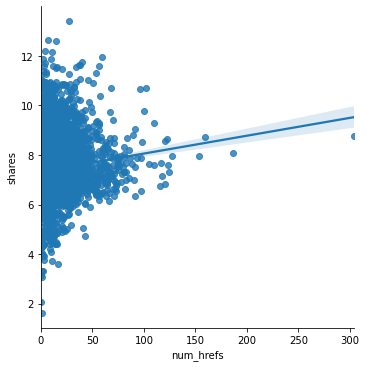

In [33]:
lm_plot(comp_para, df_compiled)

num_hrefs are the number of links in the page

It appears that there is a positive correlation between the number of links in the page and shares. This may be because webpages with more links may be deemed to be more informative/credible that makes it more desirable to be shared

Pearson results for num_self_hrefs are:
------------------------------
                num_self_hrefs    shares
num_self_hrefs        1.000000  0.041113
shares                0.041113  1.000000


Spearman results for num_self_hrefs are: 

------------------------------
                num_self_hrefs    shares
num_self_hrefs        1.000000  0.045889
shares                0.045889  1.000000


Kendall results for num_self_hrefs are: 

------------------------------
                num_self_hrefs    shares
num_self_hrefs        1.000000  0.032895
shares                0.032895  1.000000




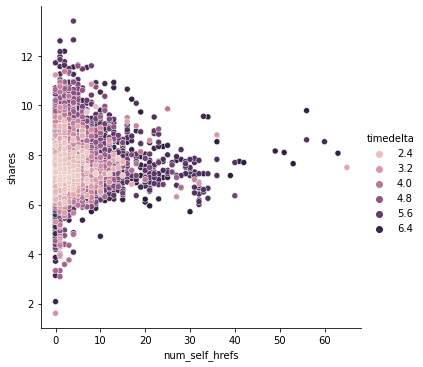

In [34]:
'''
Results of num_self_hrefs with shares
'''

comp_para='num_self_hrefs'

scatter_cor(comp_para, df_compiled)


num_self_hrefs are the number of links to other articles published by the news website

It appears that there is a less correlation between the number of links to other articles published by the news website in the page and shares than just the number of links alone. This may be because webpages with links to other articles published by the news website may be deemed to be not be any more informative/credible that makes it more desirable to be shared.

Pearson results for num_imgs are:
------------------------------
          num_imgs    shares
num_imgs  1.000000  0.049405
shares    0.049405  1.000000


Spearman results for num_imgs are: 

------------------------------
          num_imgs    shares
num_imgs  1.000000  0.055909
shares    0.055909  1.000000


Kendall results for num_imgs are: 

------------------------------
          num_imgs    shares
num_imgs  1.000000  0.042386
shares    0.042386  1.000000




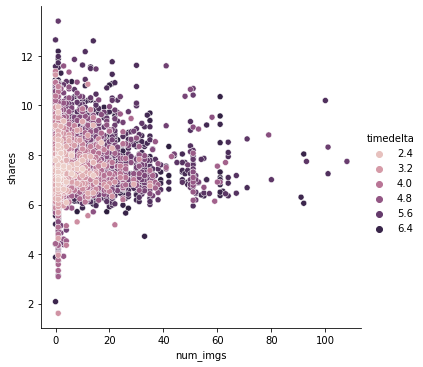

In [35]:
'''
Results of num_imgs with shares
'''

comp_para='num_imgs'

scatter_cor(comp_para, df_compiled)


The assumption may be that the increased number of images may make the articles more palatable/desirable to read and share. However, the images may comprise of ads that may detract from the article.

This may be why the correlation between the number of images and share may not be as high as expected.

Pearson results for num_videos are:
------------------------------
            num_videos    shares
num_videos    1.000000  0.021977
shares        0.021977  1.000000


Spearman results for num_videos are: 

------------------------------
            num_videos    shares
num_videos    1.000000  0.041204
shares        0.041204  1.000000


Kendall results for num_videos are: 

------------------------------
            num_videos    shares
num_videos    1.000000  0.032453
shares        0.032453  1.000000




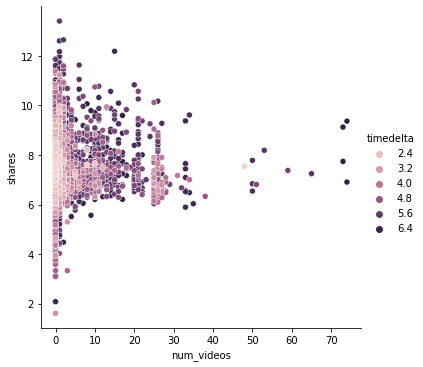

In [36]:
'''
Results of num_videos with shares
'''

comp_para='num_videos'

scatter_cor(comp_para, df_compiled)


The assumption may be that the increased number of videos may make the articles more palatable/desirable to read and share. However, the videos may comprise of ads that may detract from the article. Furthermore, the user might be redirected to the video hosting platform and share from there instead.

This may be why the correlation between the number of videos and share may not be as high as expected.

Pearson results for n_comments are:
------------------------------
            n_comments    shares
n_comments    1.000000  0.389134
shares        0.389134  1.000000


Spearman results for n_comments are: 

------------------------------
            n_comments    shares
n_comments    1.000000  0.358282
shares        0.358282  1.000000


Kendall results for n_comments are: 

------------------------------
            n_comments    shares
n_comments    1.000000  0.267266
shares        0.267266  1.000000




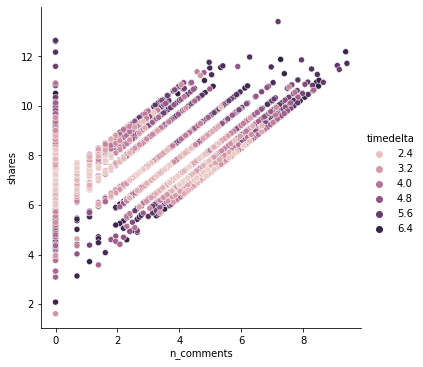

In [37]:
'''
Results of n_comments with shares
'''

comp_para='n_comments'

scatter_cor(comp_para, df_compiled)


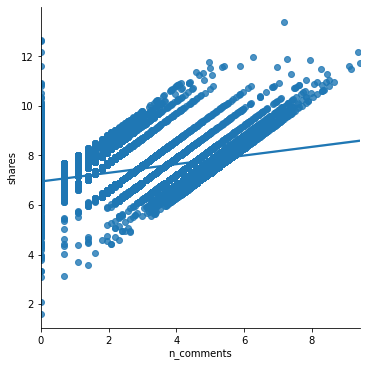

In [38]:
lm_plot(comp_para, df_compiled)

It is logical that the number of comments is correlated with the number of shares.

Comments can be used as a metric to judge the popularity/impact of the article and it serves to reason that a popular/impactful article will result in more shares.

Therefore, comments and shares were found to be correlated in this case.

Pearson results for average_token_length are:
------------------------------
                      average_token_length    shares
average_token_length              1.000000 -0.043529
shares                           -0.043529  1.000000


Spearman results for average_token_length are: 

------------------------------
                      average_token_length    shares
average_token_length              1.000000 -0.067644
shares                           -0.067644  1.000000


Kendall results for average_token_length are: 

------------------------------
                      average_token_length    shares
average_token_length              1.000000 -0.045401
shares                           -0.045401  1.000000




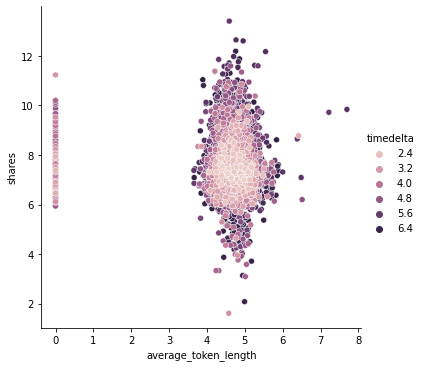

In [39]:
'''
Results of average_token_length with shares
'''

comp_para='average_token_length'

scatter_cor(comp_para, df_compiled)


Average token length is the average length of the words in the content.

The assumption is longer token lengths may make the article harder to read and therefore less likely to be shared.

Average token length in the content does not appear to be highly correlated  to the number of shares. This may be because the average token length is less than 8 and probably does not include words that may make the article harder to read. It can also be observed that the average token length is controlled as it is largely within a fixed range (4 to 6)

Pearson results for data_channel are:
------------------------------
        shares
shares     1.0


Spearman results for data_channel are: 

------------------------------
        shares
shares     1.0


Kendall results for data_channel are: 

------------------------------
        shares
shares     1.0




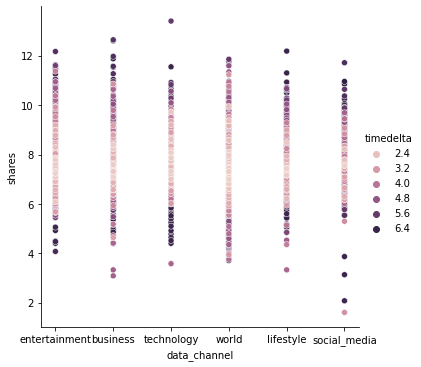

In [40]:
'''
Results of data_channel with shares
'''

comp_para='data_channel'

scatter_cor(comp_para, df_compiled)


Although correlation may not be established due to categorical data, a relationship can be observed by the various mean shares and distribution. For example, people are less likely to share about technology articles as opposed to lifestyle articles

Therefore, it may be useful as a classification feature as opposed to a regression feature.

Pearson results for self_reference_min_shares are:
------------------------------
                           self_reference_min_shares    shares
self_reference_min_shares                   1.000000  0.093259
shares                                      0.093259  1.000000


Spearman results for self_reference_min_shares are: 

------------------------------
                           self_reference_min_shares    shares
self_reference_min_shares                   1.000000  0.173829
shares                                      0.173829  1.000000


Kendall results for self_reference_min_shares are: 

------------------------------
                           self_reference_min_shares    shares
self_reference_min_shares                   1.000000  0.121676
shares                                      0.121676  1.000000




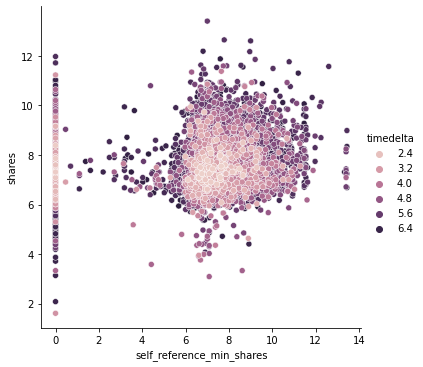

In [41]:
'''
Results of self_reference_min_shares with shares
'''

comp_para='self_reference_min_shares'

scatter_cor(comp_para, df_compiled)


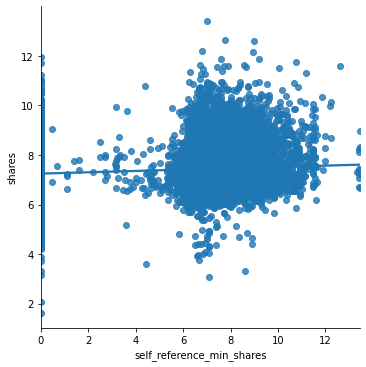

In [42]:
lm_plot(comp_para, df_compiled)

self_reference_min_shares is the minimum shares of referenced articles in the news website

The sharing of related articles in the news website appears to be correlated to the number of shares. This may be because it is shared as a followed up after being redirected from a related article.

This is plausible in the scenario where users/readers chooses to share as much relevant information with others. (e.g. disasters) 

Pearson results for self_reference_max_shares are:
------------------------------
                           self_reference_max_shares    shares
self_reference_max_shares                   1.000000  0.095296
shares                                      0.095296  1.000000


Spearman results for self_reference_max_shares are: 

------------------------------
                           self_reference_max_shares    shares
self_reference_max_shares                   1.000000  0.163666
shares                                      0.163666  1.000000


Kendall results for self_reference_max_shares are: 

------------------------------
                           self_reference_max_shares    shares
self_reference_max_shares                   1.000000  0.114011
shares                                      0.114011  1.000000




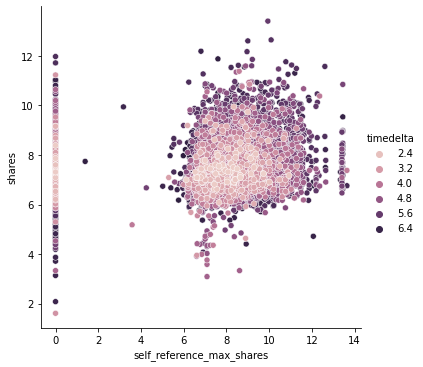

In [43]:
'''
Results of self_reference_max_shares with shares
'''

comp_para='self_reference_max_shares'

scatter_cor(comp_para, df_compiled)


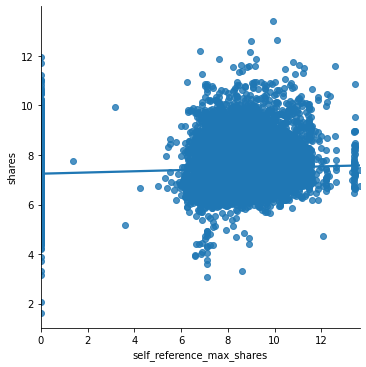

In [44]:
lm_plot(comp_para, df_compiled)

The correlation of self_reference_max_shares appear to be similar to self_reference_min_shares

Pearson results for self_reference_avg_shares are:
------------------------------
                           self_reference_avg_shares    shares
self_reference_avg_shares                   1.000000  0.098421
shares                                      0.098421  1.000000


Spearman results for self_reference_avg_shares are: 

------------------------------
                           self_reference_avg_shares    shares
self_reference_avg_shares                   1.000000  0.187882
shares                                      0.187882  1.000000


Kendall results for self_reference_avg_shares are: 

------------------------------
                           self_reference_avg_shares    shares
self_reference_avg_shares                   1.000000  0.131029
shares                                      0.131029  1.000000




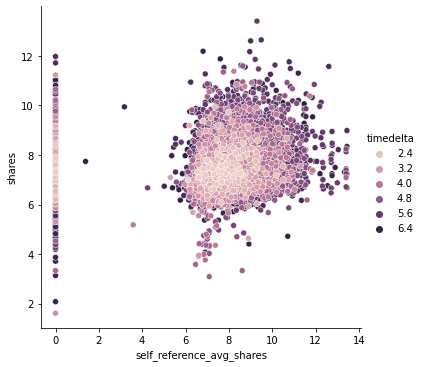

In [45]:
'''
Results of self_reference_avg_shares with shares
'''

comp_para='self_reference_avg_shares'

scatter_cor(comp_para, df_compiled)


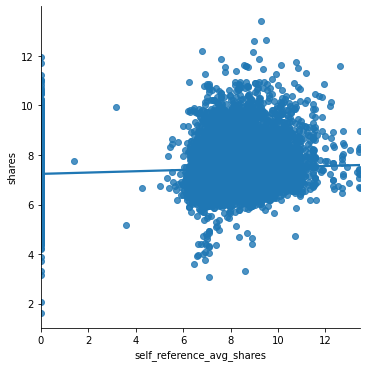

In [46]:
lm_plot(comp_para, df_compiled)

The correlation of self_reference_avg_shares appear to be similar to self_reference_min_shares and self_reference_max_shares.

However, it may be the superior feature to the 2 as it is more highly correlated to shares

Pearson results for num_keywords are:
------------------------------
              num_keywords    shares
num_keywords      1.000000  0.085504
shares            0.085504  1.000000


Spearman results for num_keywords are: 

------------------------------
              num_keywords    shares
num_keywords      1.000000  0.084955
shares            0.084955  1.000000


Kendall results for num_keywords are: 

------------------------------
              num_keywords    shares
num_keywords      1.000000  0.061114
shares            0.061114  1.000000




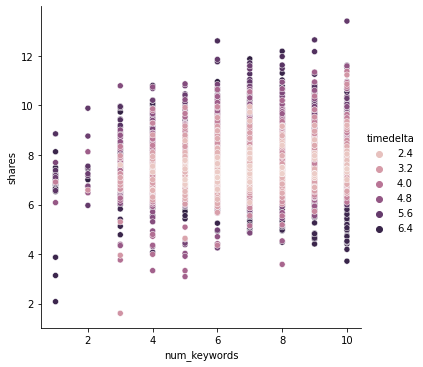

In [47]:
'''
Results of num_keywords with shares
'''

comp_para='num_keywords'

scatter_cor(comp_para, df_compiled)


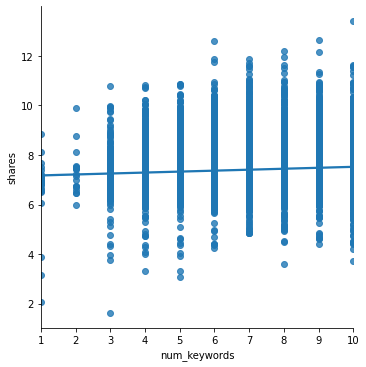

In [48]:
lm_plot(comp_para, df_compiled)

The number of keywords appear to be correlated to the number of shares. This is logical as keywords may be interpreted as what is interesting/attractive to users/readers.

Therefore, the more interesting/invocative the article is, the more likely users/readers are to share it.

Pearson results for kw_min_min are:
------------------------------
            kw_min_min    shares
kw_min_min    1.000000  0.033453
shares        0.033453  1.000000


Spearman results for kw_min_min are: 

------------------------------
            kw_min_min    shares
kw_min_min    1.000000  0.012437
shares        0.012437  1.000000


Kendall results for kw_min_min are: 

------------------------------
            kw_min_min    shares
kw_min_min    1.000000  0.009289
shares        0.009289  1.000000




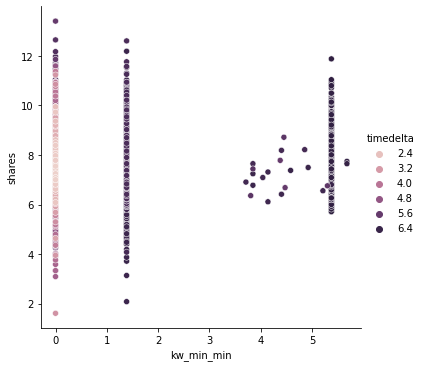

In [49]:
'''
Results of kw_min_min with shares
'''

comp_para='kw_min_min'

scatter_cor(comp_para, df_compiled)


There does not appear to be a correlation between minimum shares any article obtained with the worst
performing keyword in the article and shares.

This may be because the worst performing keyword is not indicative of the lower limit of how sharable an article is.

Pearson results for kw_max_min are:
------------------------------
            kw_max_min    shares
kw_max_min    1.000000  0.092778
shares        0.092778  1.000000


Spearman results for kw_max_min are: 

------------------------------
            kw_max_min    shares
kw_max_min    1.000000  0.089853
shares        0.089853  1.000000


Kendall results for kw_max_min are: 

------------------------------
            kw_max_min    shares
kw_max_min    1.000000  0.060831
shares        0.060831  1.000000




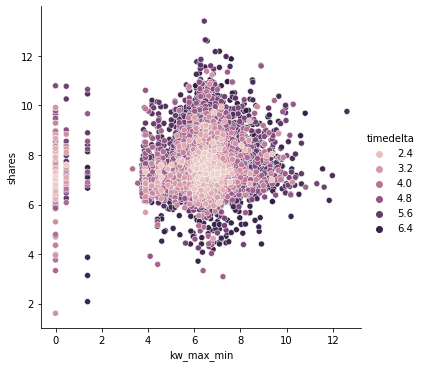

In [50]:
'''
Results of kw_max_min with shares
'''

comp_para='kw_max_min'

scatter_cor(comp_para, df_compiled)


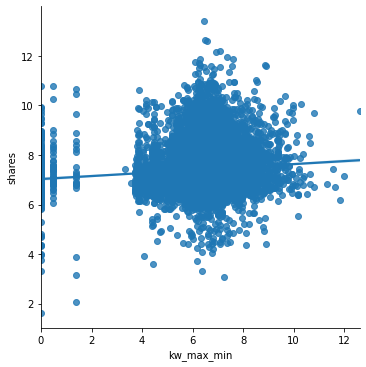

In [51]:
lm_plot(comp_para, df_compiled)

There appear to be a correlation between maximum shares any article obtained with the worst
performing keyword in the article and shares.

This may be because the worst performing keyword is indicative of the upper limit of how sharable an article is.

Pearson results for kw_avg_min are:
------------------------------
            kw_avg_min    shares
kw_avg_min    1.000000  0.095834
shares        0.095834  1.000000


Spearman results for kw_avg_min are: 

------------------------------
            kw_avg_min   shares
kw_avg_min     1.00000  0.10433
shares         0.10433  1.00000


Kendall results for kw_avg_min are: 

------------------------------
            kw_avg_min    shares
kw_avg_min    1.000000  0.070448
shares        0.070448  1.000000




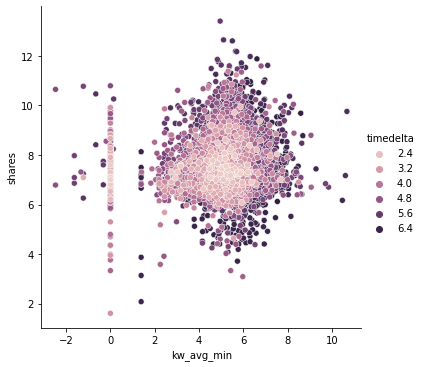

In [52]:
'''
Results of kw_avg_min with shares
'''

comp_para='kw_avg_min'

scatter_cor(comp_para, df_compiled)


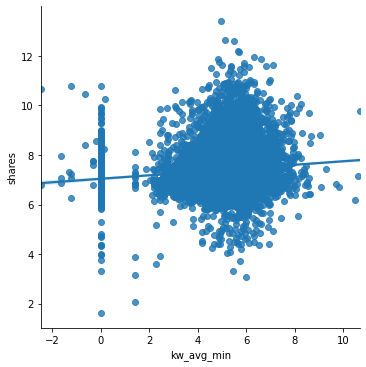

In [53]:
lm_plot(comp_para, df_compiled)

There appear to be a correlation between average shares any article obtained with the worst performing keyword in the article and shares.

It outperforms kw_min_min and kw_max_min

Pearson results for kw_min_max are:
------------------------------
            kw_min_max    shares
kw_min_max    1.000000  0.010754
shares        0.010754  1.000000


Spearman results for kw_min_max are: 

------------------------------
            kw_min_max    shares
kw_min_max    1.000000  0.037216
shares        0.037216  1.000000


Kendall results for kw_min_max are: 

------------------------------
            kw_min_max    shares
kw_min_max    1.000000  0.027075
shares        0.027075  1.000000




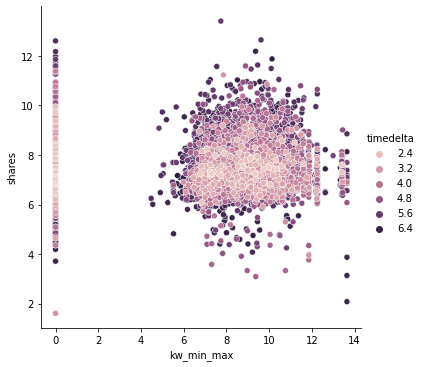

In [54]:
'''
Results of kw_min_max with shares
'''

comp_para='kw_min_max'

scatter_cor(comp_para, df_compiled)


kw_min_max is the minimum shares any article obtained with the best performing keyword in the article

There appear to be little correlation with shares.

Pearson results for kw_max_max are:
------------------------------
            kw_max_max    shares
kw_max_max    1.000000  0.001079
shares        0.001079  1.000000


Spearman results for kw_max_max are: 

------------------------------
            kw_max_max    shares
kw_max_max    1.000000 -0.050819
shares       -0.050819  1.000000


Kendall results for kw_max_max are: 

------------------------------
            kw_max_max    shares
kw_max_max    1.000000 -0.040015
shares       -0.040015  1.000000




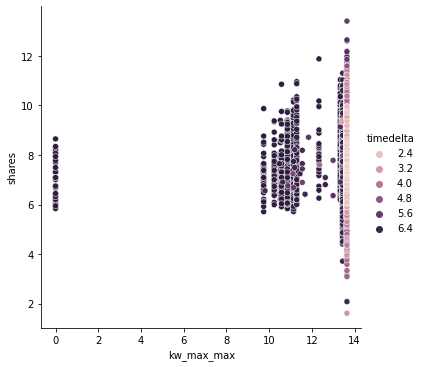

In [55]:
'''
Results of kw_max_max with shares
'''

comp_para='kw_max_max'

scatter_cor(comp_para, df_compiled)


kw_max_max is the Maximum shares any article obtained with the best performing keyword in the article

There appear to be little correlation with shares.

Pearson results for kw_avg_max are:
------------------------------
            kw_avg_max   shares
kw_avg_max     1.00000  0.00377
shares         0.00377  1.00000


Spearman results for kw_avg_max are: 

------------------------------
            kw_avg_max    shares
kw_avg_max    1.000000 -0.014024
shares       -0.014024  1.000000


Kendall results for kw_avg_max are: 

------------------------------
            kw_avg_max   shares
kw_avg_max     1.00000 -0.00925
shares        -0.00925  1.00000




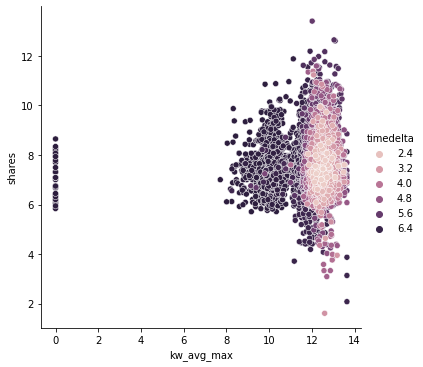

In [56]:
'''
Results of kw_avg_max with shares
'''

comp_para='kw_avg_max'

scatter_cor(comp_para, df_compiled)


kw_avg_max is the average shares any article obtained with the best performing keyword in the article

There appear to be little correlation with shares.

Pearson results for kw_min_avg are:
------------------------------
            kw_min_avg    shares
kw_min_avg    1.000000  0.010805
shares        0.010805  1.000000


Spearman results for kw_min_avg are: 

------------------------------
            kw_min_avg    shares
kw_min_avg    1.000000  0.083199
shares        0.083199  1.000000


Kendall results for kw_min_avg are: 

------------------------------
            kw_min_avg    shares
kw_min_avg    1.000000  0.060688
shares        0.060688  1.000000




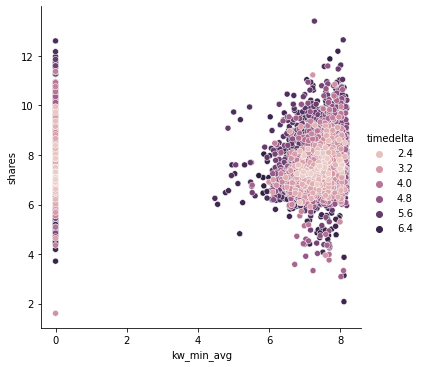

In [57]:
'''
Results of kw_min_avg with shares
'''

comp_para='kw_min_avg'

scatter_cor(comp_para, df_compiled)


kw_min_avg is the minimum shares any article obtained with the median performing keyword in the article

There appear to be little correlation with shares.

Pearson results for kw_max_avg are:
------------------------------
            kw_max_avg    shares
kw_max_avg    1.000000  0.138298
shares        0.138298  1.000000


Spearman results for kw_max_avg are: 

------------------------------
            kw_max_avg    shares
kw_max_avg    1.000000  0.204687
shares        0.204687  1.000000


Kendall results for kw_max_avg are: 

------------------------------
            kw_max_avg    shares
kw_max_avg    1.000000  0.140207
shares        0.140207  1.000000




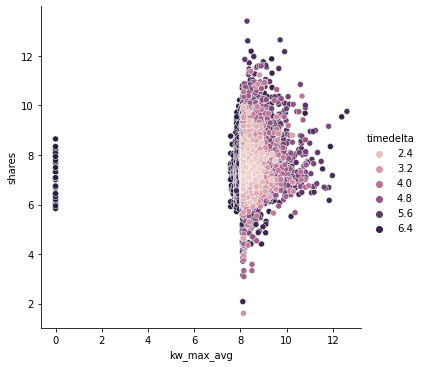

In [58]:
'''
Results of kw_max_avg with shares
'''

comp_para='kw_max_avg'

scatter_cor(comp_para, df_compiled)


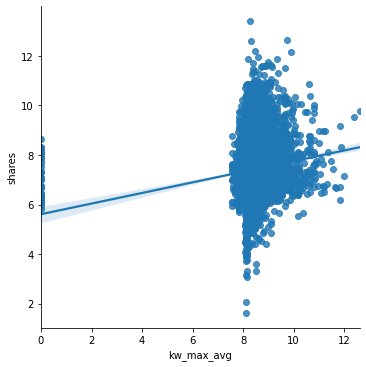

In [59]:
lm_plot(comp_para, df_compiled)

kw_max_avg is the maximum shares any article obtained with the median performing keyword in the article

There appear to be correlation with shares that can be used as part of regression.

Pearson results for kw_avg_avg are:
------------------------------
            kw_avg_avg    shares
kw_avg_avg    1.000000  0.147769
shares        0.147769  1.000000


Spearman results for kw_avg_avg are: 

------------------------------
            kw_avg_avg    shares
kw_avg_avg    1.000000  0.236258
shares        0.236258  1.000000


Kendall results for kw_avg_avg are: 

------------------------------
            kw_avg_avg    shares
kw_avg_avg    1.000000  0.161105
shares        0.161105  1.000000




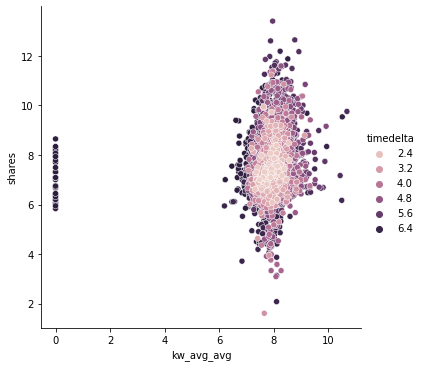

In [60]:
'''
Results of kw_avg_avg with shares
'''

comp_para='kw_avg_avg'

scatter_cor(comp_para, df_compiled)


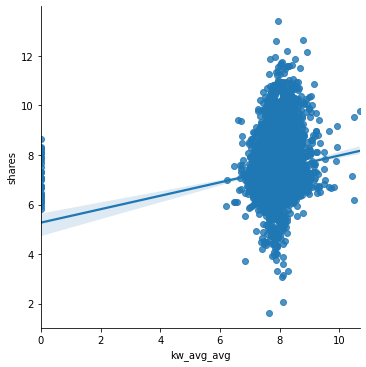

In [61]:
lm_plot(comp_para, df_compiled)

kw_avg_avg is the average shares any article obtained with the median performing keyword in the article

There appear to be correlation with shares that can be used as part of regression.

## Final Observations

#### From the visualisations and correlations observed, the proposed features are as follows:

<u>Regression/Classification features</u>
1. timedelta
2. num_hrefs
3. n_comments
4. self_reference_min_shares (optional with self_reference_avg_shares)
5. self_reference_max_shares (optional with self_reference_avg_shares)
6. self_reference_avg_shares
7. num_keywords
8. kw_max_min (optional with kw_avg_min)
9. kw_avg_min
10. kw_max_avg (optional with kw_avg_avg)
11. kw_avg_avg
12. weekday (to be one-hot)
13. n_tokens_title
14. data_channel (to be one-hot)
15. n_tokens_content (optional)

Too many features may cause overfitting so the above features (non-optional) are selected to be used in the ML models